# Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [59]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
import joblib

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
sns.set_style('darkgrid')

# Data extraction

In [7]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Basic Data Exploration

In [8]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

# Exploratory data analysis

## Fixed acidity

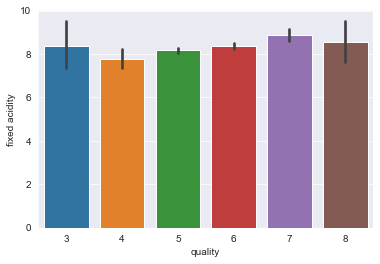

In [12]:
sns.barplot('quality', 'fixed acidity', data=df)
plt.show()

Fixed acidity doesn't give any specification on quality

## Volatile acidity

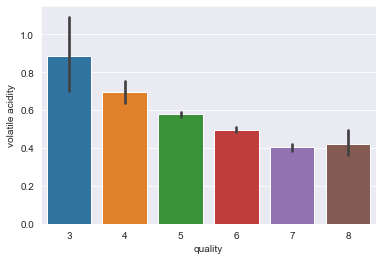

In [13]:
sns.barplot('quality', 'volatile acidity', data=df)
plt.show()

Quality Decreases with volatile acidity

## Citric acid 

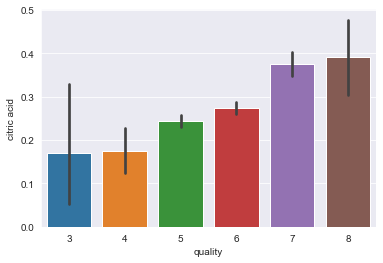

In [14]:
sns.barplot('quality', 'citric acid', data=df)
plt.show()

Quality increases with citric acid

## Residual sugar

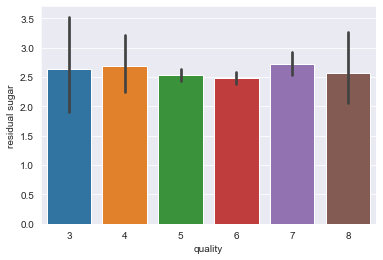

In [15]:
sns.barplot('quality', 'residual sugar', data=df)
plt.show()

Residual sugar doesn't give any specification on quality

## Chlorides

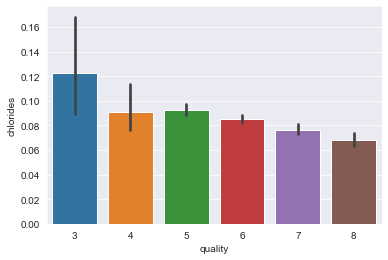

In [16]:
sns.barplot('quality', 'chlorides', data=df)
plt.show()

Quality decreases with chlorides

## Free sulfur dioxide

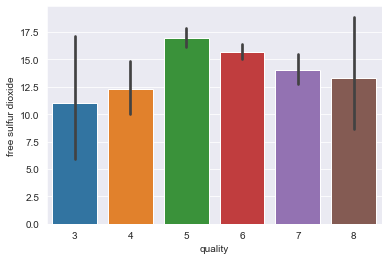

In [17]:
sns.barplot('quality', 'free sulfur dioxide', data=df)
plt.show()

Free sulfur dioxide doesn't give any specification on quality

## Total sulfur dioxide

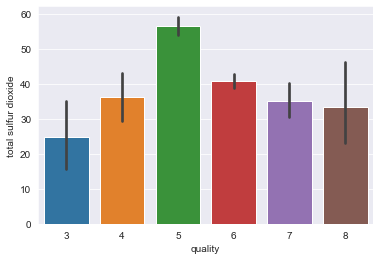

In [18]:
sns.barplot('quality', 'total sulfur dioxide', data=df)
plt.show()

Total sulfur dioxide doesn't give any specification on quality

## Density

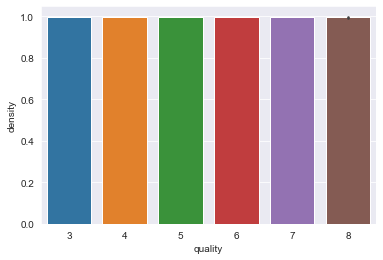

In [19]:
sns.barplot('quality', 'density', data=df)
plt.show()

Density is constant so this row is not necessary 

## pH

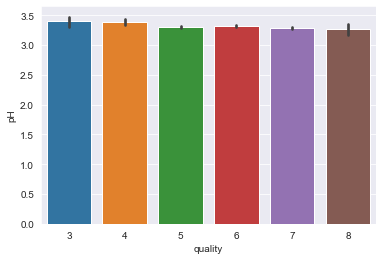

In [20]:
sns.barplot('quality', 'pH', data=df)
plt.show()

pH is constant so this row is not necessary

## Sulphates 

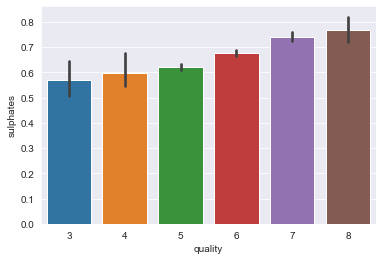

In [21]:
sns.barplot('quality', 'sulphates', data=df)
plt.show()

Quality increases with sulphates

## Alcohol

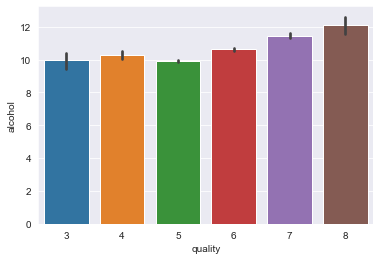

In [22]:
sns.barplot('quality', 'alcohol', data=df)
plt.show()

Quality increases with alcohol

# Data cleaning

In [23]:
df = df.drop(['density','pH'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5


In [24]:
# 0 = bad
# 1 = good
wine_quality = [0, 1]
df['quality'] = pd.cut(df['quality'], bins=[2, 5, 8], labels=wine_quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0


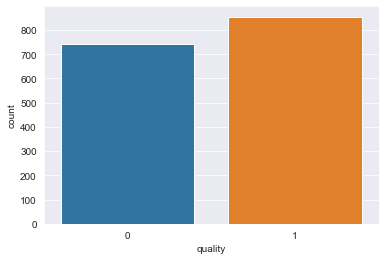

In [25]:
sns.countplot(df['quality'])
plt.show()

# Correlation analysis

In [26]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

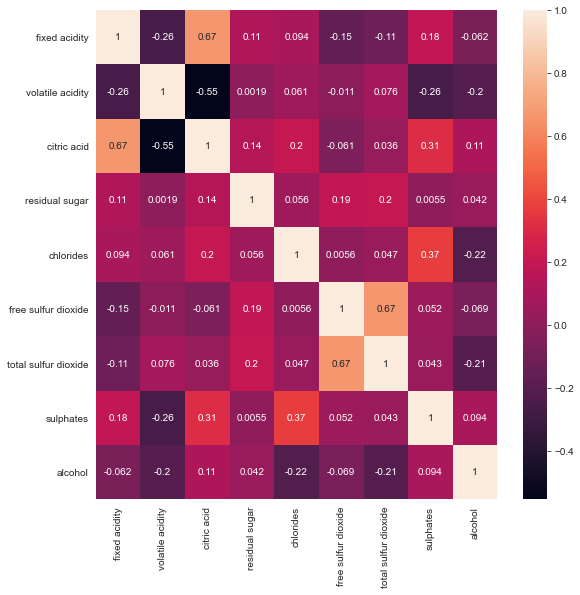

In [27]:
plt.figure(figsize=(9, 9))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Feature importance

In [28]:
model_fi = ExtraTreesRegressor()
model_fi.fit(X, Y)

ExtraTreesRegressor()

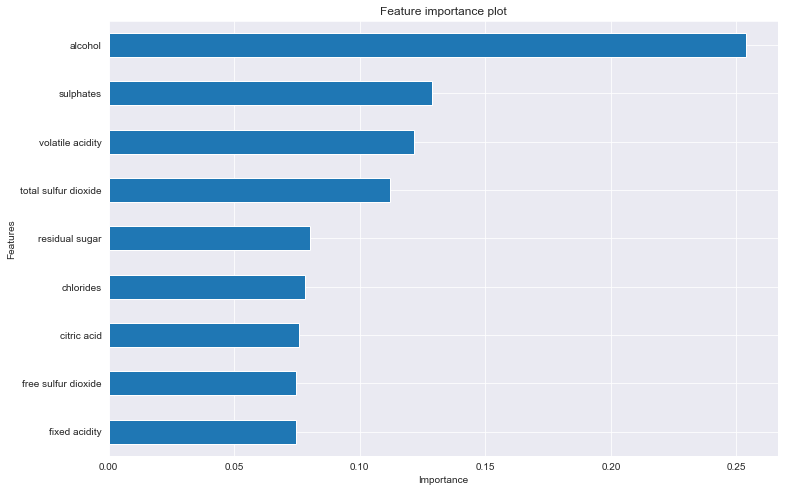

In [29]:
plt.figure(figsize=(12,8))

feat_importance = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')

plt.title('Feature importance plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Train/Test split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Normalisation 

In [31]:
scaler_X = MinMaxScaler()

scaler_X.fit(X_train)

MinMaxScaler()

In [32]:
X_train = scaler_X.transform(X_train)

X_test = scaler_X.transform(X_test)

# Models

# Selecting best model

In [33]:
SVM = SVC()
random_forest = RandomForestClassifier()

In [34]:
C = list(np.arange(start=0, stop=1001, step=20, dtype='int64'))
kernel = ['linear', 'rbf', 'poly']

n_estimators = list(np.arange(start=0, stop=201, step=10, dtype='int64'))

In [37]:
model_params = {
    'Support Vector Machine':{
        'model': SVM,
        'params':{
            'C': C,
            'kernel': kernel
        }
    },
    'Random Forest':{
        'model': random_forest,
        'params':{
            'n_estimators': n_estimators
        }
    }
}

In [38]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='f1', 
                                    cv=5,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

In [39]:
best_params = pd.DataFrame(scores)
best_params

,model,Best Score,Best Parameter
0,Support Vector Machine,0.751936,"{'kernel': 'linear', 'C': 520}"
1,Random Forest,0.802636,{'n_estimators': 180}


## Testing on random forest

In [46]:
best_rfc = RandomForestClassifier(n_estimators=180)
best_rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=180)

In [47]:
Y_pred_rfc = best_model.predict(X_test)

F1 Score = 0.8387096774193549


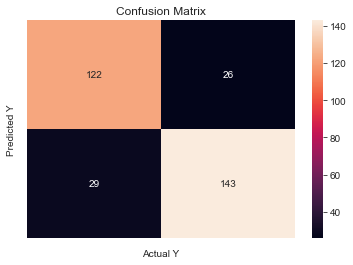

In [49]:
f1Score_rfc = f1_score(Y_test, Y_pred_rfc, average='binary')
print('F1 Score =', f1Score_rfc)

cm_rfc = confusion_matrix(Y_test, Y_pred_rfc);

sns.heatmap(cm_rfc, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()

## Linear Discriminant Analysis

In [52]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [53]:
Y_pred_lda = LDA.predict(X_test)

F1 Score = 0.7683284457478006


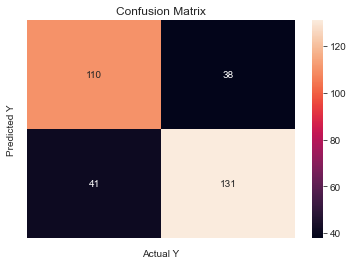

In [54]:
f1Score_lda = f1_score(Y_test, Y_pred_lda, average='binary')
print('F1 Score =', f1Score_lda)

cm_lda = confusion_matrix(Y_test, Y_pred_lda);

sns.heatmap(cm_lda, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()

## Quadratic Discriminant Analysis

In [55]:
QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis()

In [56]:
Y_pred_qda = QDA.predict(X_test)

F1 Score = 0.7547169811320754


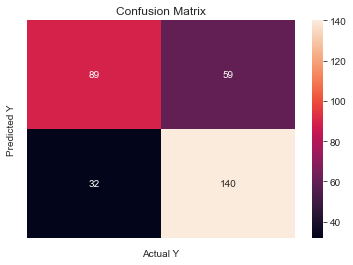

In [57]:
f1Score_qda = f1_score(Y_test, Y_pred_qda, average='binary')
print('F1 Score =', f1Score_qda)

cm_qda = confusion_matrix(Y_test, Y_pred_qda);

sns.heatmap(cm_qda, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()

## Naive Bayes

In [60]:
NB = GaussianNB()

NB.fit(X_train, Y_train)

GaussianNB()

In [61]:
Y_pred_nb = NB.predict(X_test)

F1 Score = 0.7586206896551724


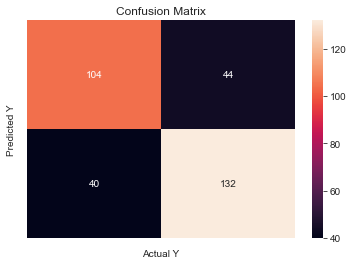

In [62]:
f1Score_nb = f1_score(Y_test, Y_pred_nb, average='binary')
print('F1 Score =', f1Score_nb)

cm_nb = confusion_matrix(Y_test, Y_pred_nb);

sns.heatmap(cm_nb, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()

## Traning on best model

In [63]:
best_model = RandomForestClassifier(n_estimators=180)

best_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=180)

# Saving the best model

In [64]:
file = open('wine_quality_prediction.pkl', 'wb')
joblib.dump(best_model, file)

In [65]:
file = open('min_max_X.pkl', 'wb')
joblib.dump(scaler_X, file)